# Titanic Data Analysis
## By Nathaniel Wharton
 
In this exercise, data of The Titanic disaster, will be analyzed.  Specifically, passenger information and demographics  from 891 of the 2224 passengers and crew.  You can learn more about the data: [here](https://www.kaggle.com/c/titanic/data).

#### The following areas/questions will be explored:
* Data Overview (Variables, Descriptive Statistics)
* What does the age distribution of passengers look like?
* How many passengers embarked from each port?
* What factors made people more likely to survive? e.g: was sex, embarkage port, or ticket class more-likely to be associated with survival?

Note: it is not indicated in the source documentation how this data was obtaned, whether it was e.g: randomly selected from the total population of data, or if it is the only data available for some reason. This is a very important if we are to draw any conclusions from the data. 

# Data Overview: Variables


|variable    | definition / key          |
|------------|---------------------------|
|survival    |Survival	0 = No, 1 = Yes  |
|pclass      |Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex         |Sex|
|age |Age in years|
|sibsp | # of siblings / spouses aboard the Titanic |
|parch|# of parents / children aboard the Titanic |
|ticket| Ticket number |
|fare| Passenger fare	|
|cabin| Cabin number |
|embarked | Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|

## Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


source: [here](https://www.kaggle.com/c/titanic/data)


In [1]:
# import all libraries needed for the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# allow for charts to show in this analysis notebook.
%pylab inline 

titanic_passengers = pd.read_csv('titanic-data.csv') # passenger data is read into Pandas

/Users/n/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_passengers.head() # A few lines of the dataset gives an overview of the data formatting

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see in the table above that there is missing data for the Cabin number, even in the head.

### Some Data Wrangling

In [3]:
# Create Survival, Class, and Ports Columns for clearer plot labels
titanic_passengers['Survival'] = titanic_passengers.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic_passengers['Class'] = titanic_passengers.Pclass.map({1 : '1st Class', 2 : '2nd Class', 3 : '3rd Class'})
titanic_passengers['Ports'] = titanic_passengers.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

## Data Overview: Descriptive Statistics

In [4]:
# Quick Check: How many passengers are we looking at in this dataset?
len(titanic_passengers)

891

In [5]:
titanic_passengers.describe() # a more-detailed look - descriptive statistics

/Users/n/anaconda/envs/py27/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Notable details in the above sample statistics:

* Note that Name, Sex, Ticket, Cabin, and Embarked are all missing from the above table because their datatype is String

* Looking at the data tables above we see that there are 891 records for all columns, except for 'Age' which appears to be missing entries.

* We see that the average survival rate of this sample of passengers is 0.384 = 38.4% - which is higher than expected.

* The average ticket class is 2.3 (so between 2nd Class and 3rd Class, closer to 2nd class).

* The average age of the passenger in this dataset is roughly 30 years old.  We can see the age range reported is from infants (just 0.42 years old) to a max of 80 years old) - so a wide range of ages.

* The average ticket price was 32.2 (dollars(?)), but there is a wide distribution up to a max of 512 - so there is a wide range of ticket prices. A point of exploration might be to see if infants/children are charged less than adults - as this might affect the analysis. It's not clear if a ticket might represent e.g: parents and chlidren, or just one person.


In [6]:
titanic_passengers.info() # get basic information on the Pandas DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survival       891 non-null object
Class          891 non-null object
Ports          889 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [7]:
mean_survival_rate_of_passengers = titanic_passengers['Survived'].mean()
print "mean_survival_rate_of_passengers: {}".format(mean_survival_rate_of_passengers)

mean_survival_rate_of_passengers: 0.383838383838


### Notable in the above data findings:

* The mean survival rate of a passenger is listed above (roughly **38%**)
* We see again that Age is missing for (891-714) 177 passengers. 
* We see that Cabin is missing for (891 - 204) 687 passengers(!) - thus this data is not very useful. It will be ignored.
* We see that Embarked is missing for 2 passengers.

In [8]:
# data wrangling: Cabin will be dropped since it won' be used:
titanic_passengers = titanic_passengers.drop('Cabin', axis=1)

## Correlation Overview
We will look at correlations between variables by generating a matrix, plotting each field's correlation against all others. This can give an idea of where to focus the analysis.

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


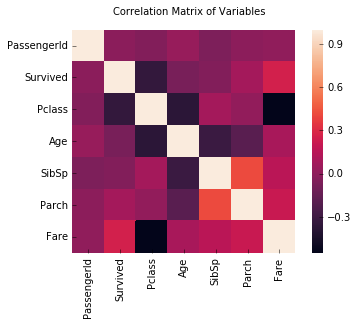

In [9]:
variable_correlations = titanic_passengers.corr(method='pearson')
print variable_correlations;
sns.heatmap(variable_correlations, square=True);
plt.suptitle("Correlation Matrix of Variables");


Briefly, we see there is a negative correlation between survival and ticket class (**r=-0.34**), thus a higher ticket class (a lower number) is correlated with higher survival. We will be sure to look at this.  We can see that Fare and Ticket Class are negatively correlated (**r=-0.54**), but this is unsurprising. We can see other variables such as Age has some degree of correlation that we can explore.

## Exploration: Passengers by Age:
What does the age distribution of passengers look like? Here is just an exploration of the data

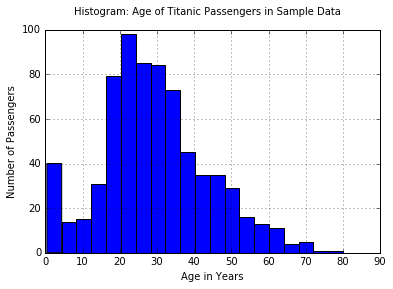

In [10]:
titanic_passengers['Age'].hist(bins=20);
plt.suptitle("Histogram: Age of Titanic Passengers in Sample Data");
plt.ylabel('Number of Passengers');
plt.xlabel('Age in Years');

We can see most people were around their 20s and 30s onboard. There were a bunch of infants (5 or less, and someone as old as 80).

## Let's explore/Analyze: How many passengers embarked from each port?

Ports
Cherbourg      168
Queenstown      77
Southampton    644
Name: PassengerId, dtype: int64


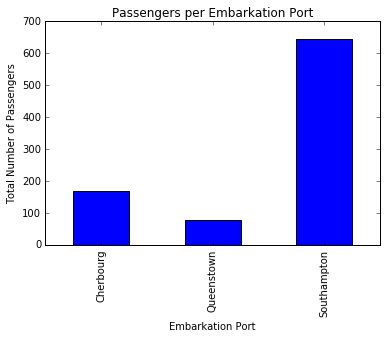

In [11]:
passengers_by_port = titanic_passengers.groupby('Ports')['PassengerId'].count()
print passengers_by_port

# plot of the passenger counts for each embarkment port
ax = passengers_by_port.plot(kind='bar', title="Passengers per Embarkation Port");
ax.set(xlabel="Embarkation Port", ylabel="Total Number of Passengers");

The majority of passengers in our sample came from **Southhampton** (644), fewer came from **Cherbourg** (168), and just 77 came from **Queenstown**.

We see again the small issue in data quality here, as well - that the sum of the ports 168+77+644 = 889 (instead of 891, that 2 embarkation ports are missing in the data. We will just leave out the missing data points.

#### Let's break that into percentages for clarity

Total passengers w/embarked port: 889
Ports
Cherbourg      0.188976
Queenstown     0.086614
Southampton    0.724409
Name: PassengerId, dtype: float64


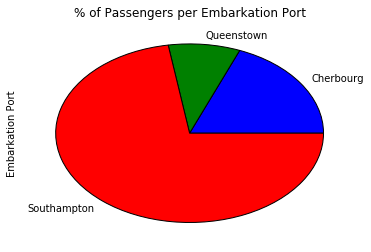

In [12]:
# we take sum of the passengers with an embarkation port (note: we see there are 889, not 891)
total_passengers_embarked = passengers_by_port.sum()
print "Total passengers w/embarked port: {}".format(total_passengers_embarked)

# We take the count of passengers by port and divide by the sum of all passengers with an embarkation port
pct_passengers_by_port = passengers_by_port / total_passengers_embarked
print pct_passengers_by_port
ax = pct_passengers_by_port.plot(kind="pie", title="% of Passengers per Embarkation Port");
ax.set(ylabel="Embarkation Port");

We see that the majority, **~72%** of passengers, came from Southampton, **~19%** came from Queenstown, and **~7%** came form Cherbourg. Also note that 2 passengers weren't counted in these percentages becuase their embarkation port wasn't specified.

## Let's Explore / Analyze: How was survival affected by the passenger's sex?

Sex
female    314
male      577
Name: PassengerId, dtype: int64


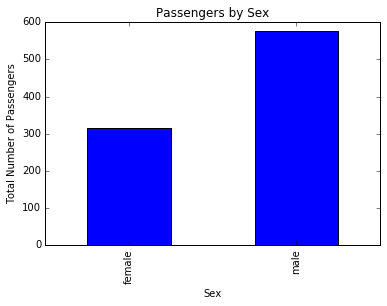

In [13]:
# let's first see how many women/men are in our sample?
passengers_by_sex = titanic_passengers.groupby('Sex')['PassengerId'].count()
print passengers_by_sex
ax = passengers_by_sex.plot(kind='bar', title="Passengers by Sex");
ax.set(xlabel="Sex",ylabel="Total Number of Passengers");

Oddly, most passengers in our sample data are male! Let's look at the percentages:

Total passengers w/sex: 891
Sex
female    0.352413
male      0.647587
Name: PassengerId, dtype: float64


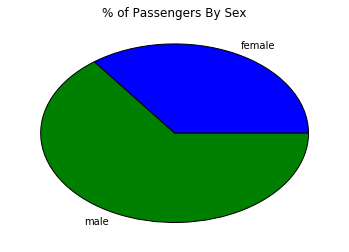

In [14]:
# add up the passengers for the denominator:
sum_passengers_by_sex = passengers_by_sex.sum(axis=0) 
print "Total passengers w/sex: {}".format(sum_passengers_by_sex) 
pct_passengers_by_sex = passengers_by_sex / sum_passengers_by_sex
print pct_passengers_by_sex
ax = pct_passengers_by_sex.plot(kind='pie', title="% of Passengers By Sex");
ax.set(xlabel="",ylabel="");

We see that 35% of the passengers in our dataset are female and 65% are male.

#### Let's see the survival statics by sex:

In [15]:
passenger_survival_by_sex = titanic_passengers.groupby(['Survival','Sex'])['PassengerId'].count()
print passenger_survival_by_sex

Survival  Sex   
Died      female     81
          male      468
Survived  female    233
          male      109
Name: PassengerId, dtype: int64


Survival  Died  Survived
Sex                     
female      81       233
male       468       109


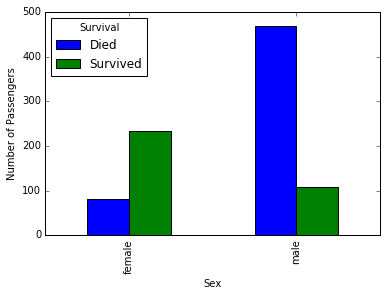

In [16]:
# by unstacking, we pivot stacked rows to columns generating a plotable table with the same counts of survival as above
passenger_survival_by_sex_unstacked_0 = passenger_survival_by_sex.unstack(level=0)
print passenger_survival_by_sex_unstacked_0
ax = passenger_survival_by_sex_unstacked_0.plot(kind="bar");
ax.set(xlabel="Sex",ylabel="Number of Passengers");

We see that females were more-likely to have survived than males. Of the female population, **233** survived and **81** died.  Of males, **109** survived and **468** died.

let's look at the groups by percentage

Survival
Died        549
Survived    342
dtype: int64
Survival      Died  Survived
Sex                         
female    0.147541  0.681287
male      0.852459  0.318713


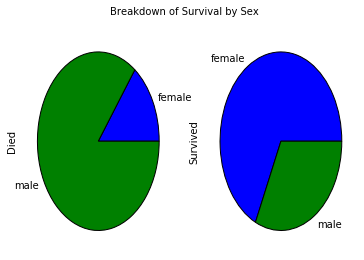

In [17]:
# we want to see our data compared to the total of members of the sex
total_of_each_sex = passenger_survival_by_sex_unstacked_0.sum(axis=0)
print total_of_each_sex
pct_passenger_survival_by_sex = passenger_survival_by_sex_unstacked_0/ total_of_each_sex
print pct_passenger_survival_by_sex
pct_passenger_survival_by_sex.plot(kind='pie', subplots=True, title="Breakdown of Survival by Sex", legend=False);


Of those who died, **85%** were male and **14%** were female. Of those who survived, **68%** were female and **31%** were male.

## How Was Survival Affected by Embarkation Port?
We looked at embarkation port data earlier. Let's now compare that with survival data.

Survival  Ports      
Died      Cherbourg       75
          Queenstown      47
          Southampton    427
Survived  Cherbourg       93
          Queenstown      30
          Southampton    217
Name: PassengerId, dtype: int64
Survival     Died  Survived
Ports                      
Cherbourg      75        93
Queenstown     47        30
Southampton   427       217


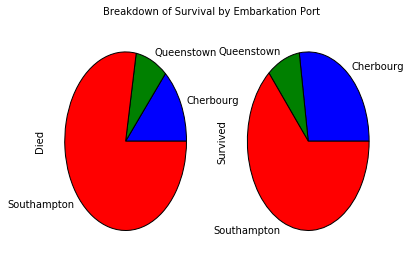

In [18]:
passengers_survival_by_port = titanic_passengers.groupby(['Survival','Ports'])['PassengerId'].count()
print passengers_survival_by_port

# lets pivot the port to a column..
passengers_survival_by_port_unstacked_0 = passengers_survival_by_port.unstack(level=0)
print passengers_survival_by_port_unstacked_0
passengers_survival_by_port_unstacked_0.plot(kind='pie', subplots=True, 
                                             title="Breakdown of Survival by Embarkation Port", legend=False);

We see above that passengers from Cherbourg appear to be associated with a higher level of survivorship than from Queenstown or Southampton.  

In [19]:
# let's look at percentages:
pct_passengers_survival_by_port_unstacked_0 = passengers_survival_by_port_unstacked_0 / passengers_survival_by_port_unstacked_0.sum(axis=0)
print pct_passengers_survival_by_port_unstacked_0

Survival         Died  Survived
Ports                          
Cherbourg    0.136612  0.273529
Queenstown   0.085610  0.088235
Southampton  0.777778  0.638235


In fact, while **14%** of the deceased passengers were from Cherbourg, **27%** of the survivors were from there. Perhaps they had more-time on board to get familiar with where the lifeboats were located on the ship, or some other factor. Note again that 2 passengers weren't counted in the percentages because they lacked an embarkation port.

## How was Survival affected by Ticket Class?

In [20]:
# We can see counts of those who survived and who didn't broken out by ticket class below:
passengers_survival_by_class = titanic_passengers.groupby(['Survival','Class'])['PassengerId'].count()
passengers_survival_by_class

Survival  Class    
Died      1st Class     80
          2nd Class     97
          3rd Class    372
Survived  1st Class    136
          2nd Class     87
          3rd Class    119
Name: PassengerId, dtype: int64

Survival   Died  Survived
Class                    
1st Class    80       136
2nd Class    97        87
3rd Class   372       119


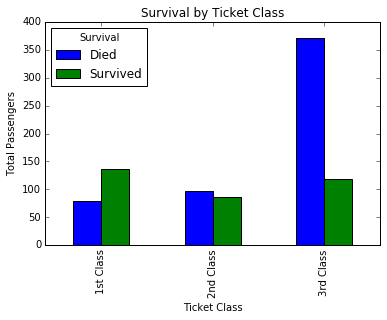

In [21]:
# by unstacking, we pivot stacked rows to columns generating a plotable table with the same counts of survival as above
passengers_by_class_unstacked_0 = passengers_survival_by_class.unstack(level=0)
print passengers_by_class_unstacked_0
ax = passengers_by_class_unstacked_0.plot(kind="bar", title="Survival by Ticket Class");
ax.set(xlabel="Ticket Class", ylabel="Total Passengers");

We can clearly many more third-class passengers in our data sample, died (372) than survived (119), and by far more than the other classes.
For second-class passengers, more died (97) than survived (87), but it was close.
For first-class passengers, more survived (136) than died (80).

In our sample data, it's clear that lower ticket class is associated with higher mortality rates.

### Let's now try to get a sense of percentage differences between the class/survival groups:
We'll start with calculating/displaying the total count of survivors for each alass

Class
1st Class    216
2nd Class    184
3rd Class    491
dtype: int64


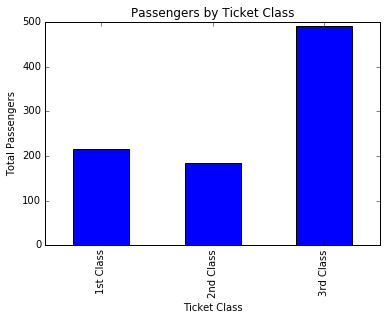

In [22]:
# The total sums of passengers by class for each column is computed (which we'll use for the percentage denominator)
columnwise_sum_passengers_by_class = passengers_by_class_unstacked_0.sum(axis=1)
print columnwise_sum_passengers_by_class
ax = columnwise_sum_passengers_by_class.plot(kind="bar", title="Passengers by Ticket Class");
ax.set(xlabel="Ticket Class",ylabel="Total Passengers");

There are more 3rd class tickets (491) then 1st or 2nd class. There are relatively similar numbers of first-class tickets (216) and second-class tickets (184).

In [23]:
# by unstacking, we, this time, use class for columns and survival for rows
passengers_survival_by_class_unstacked_1 = passengers_survival_by_class.unstack(level=1)
passengers_survival_by_class_unstacked_1

Class,1st Class,2nd Class,3rd Class
Survival,,,
Died,80,97,372
Survived,136,87,119


In [24]:
# We calculate percentages of survival by taking the count of survivors over the sum of passengers
pct_passenger_survival_by_class = passengers_survival_by_class_unstacked_1 / columnwise_sum_passengers_by_class
pct_passenger_survival_by_class

Class,1st Class,2nd Class,3rd Class
Survival,,,
Died,0.37037,0.527174,0.757637
Survived,0.62963,0.472826,0.242363


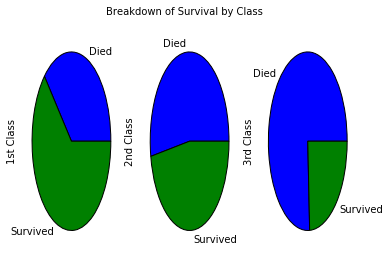

In [25]:
pct_passenger_survival_by_class.plot(kind='pie', subplots=True, title="Breakdown of Survival by Class", legend=False);

In the table above we see roughly **63%** of 1st class passengers survived, while just **47%** of 2nd class passengers, and an incredible, comparatively small **24%** of 3rd-class passengers survived.

# Conclusions
This dataset is a sample of data from passengers aboard the Titanic. It's not clear where the data came from or how it was selected, so it may not be a random sample of passengers, and thus conclusions drawn from it cannot be certain. If we had the full set of data on all passengers, it would be very interesting to re-run this analysis. There are also some data missing e.g: cabin name that would make this a more-complete analysis, 2 missing embarkation ports, multiple missing Age records, etc that could improve the analysis.  

That being said, we have explored and answered some questions about the data:

* There are many infants in the sample, and the mean age of the passengers is 29.7, younger than anticipated.
* Most passengers embarked from Southhampton.
* Just 35% of the passengers in the sample were female. Females in the sample were more-likely to have survived than males, perhaps showing that men gave up their seats in lifeboarts to women.  15% of those who died were female, while 68% of those who survived were female, an important finding.
* Passengers from Cherbourg in the dataset enjoyed a higher level of survivorship than from Queenstown or Southampton. while 14% of the deceased passengers were from Cherbourg, 27% of the survivors were from there
* We can clearly many more third-class passengers in our data sample, died (372) than survived (119), and by far more than the other classes. For second-class passengers, more died (97) than survived (87), but it was close. For first-class passengers, more survived (136) than died (80). In our sample data, it's clear that lower ticket class is associated with higher mortality rates.  Roughly 63% of 1st class passengers in our dataset survived, while just 47% of 2nd class passengers, and an incredible, comparatively small 24% of 3rd-class passengers survived.
* There is a negative correlation between survival and ticket class (**r=-0.34**), thus a higher ticket class (a lower number) is correlated with higher survival. 

Source for bargraph plotting: [https://pandas.pydata.org/pandas-docs/stable/visualization.html](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Source for titles: [https://stackoverflow.com/questions/19614400/add-title-to-collection-of-pandas-hist-plots/37907287](https://stackoverflow.com/questions/19614400/add-title-to-collection-of-pandas-hist-plots/37907287)

Source for x/y axes: [https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot](https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot)

Source for Pearson's Correlation: [https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)

A Udacity Teaching Assistant was consulted regarding unshift()